## Download Data

In [ ]:
# Training Data
# https://drive.google.com/file/d/1dHUja4XlBoJrc9QMtREXtc3pM3y9-7nu/view?usp=sharing
!gdown 1dHUja4XlBoJrc9QMtREXtc3pM3y9-7nu

Downloading...
From: https://drive.google.com/uc?id=1dHUja4XlBoJrc9QMtREXtc3pM3y9-7nu
To: /content/training_set.csv
100% 94.7M/94.7M [00:00<00:00, 106MB/s]


In [ ]:
# Test Data
# https://drive.google.com/file/d/1Zd7lZKDtfveAYwOd4LqJ8ommpveGZKMM/view?usp=sharing
!gdown 1Zd7lZKDtfveAYwOd4LqJ8ommpveGZKMM

Downloading...
From: https://drive.google.com/uc?id=1Zd7lZKDtfveAYwOd4LqJ8ommpveGZKMM
To: /content/test_set.csv
100% 23.7M/23.7M [00:00<00:00, 76.9MB/s]


In [ ]:
#Import Modules

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score


import tensorflow as tf
from keras import layers
from keras import models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from keras.layers import Activation, Conv1D, Dense, Embedding, Flatten, Input, MaxPooling1D
from keras.models import Sequential
from keras.metrics import categorical_accuracy
from keras.layers import Dense, Dropout

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.__version__)
print(tf.test.is_built_with_gpu_support())

Num GPUs Available:  0
2.14.0
True


## Import Modules

In [ ]:
#Import Modules

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

import tensorflow as tf
from keras import layers
from keras import models
from keras.layers import Activation, Conv1D, Dense, Embedding, Flatten, Input, MaxPooling1D
from keras.models import Sequential
from keras.metrics import categorical_accuracy

## Import Data

In [ ]:
train = pd.read_csv('training_set.csv')
test = pd.read_csv('test_set.csv')

In [ ]:
train.head()

,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,ind
0,1,0.231980,-0.190620,-0.985933,-0.233773,-0.355879,-0.488884,0.254773,-0.121213,-0.820528,...,0.101373,0.575414,-0.567646,-0.051293,0.455840,0.065538,0.020671,25,14,0
1,2,0.168223,-1.204551,-0.596952,-0.722583,0.284799,-0.238639,-0.410948,-0.090654,1.220703,...,0.407270,0.769329,0.555820,0.252843,0.603888,1.240028,-0.076253,23,4,0
2,3,0.522005,-0.759933,-1.209413,0.301834,0.361126,0.158161,-0.117013,0.313158,1.102455,...,0.143658,0.874958,0.679421,0.393198,0.439103,0.742181,-0.430493,29,8,0
3,4,0.038746,-1.408335,-0.580810,0.353450,1.142353,-0.418879,-0.134133,-0.199796,1.071100,...,0.728436,0.540930,1.968447,0.185315,0.630167,0.577032,0.117681,14,3,0
4,5,-0.307572,0.103575,-0.368605,-0.378654,-0.285990,-0.508058,-0.254869,-0.108291,-0.095139,...,-0.146845,0.497731,-0.299924,-0.020024,0.975511,-0.342360,-0.428779,35,9,0


In [ ]:
test.head()

,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num
0,1,0.233878,-0.575866,-0.817383,-1.308944,0.203170,-0.151178,-0.377259,-0.167252,0.260954,...,-1.252782,-0.030583,0.779688,0.680167,-0.147269,-0.162226,0.387746,-0.365837,24,7
1,2,-0.378112,0.019394,-0.261695,-0.213910,-0.339688,-0.440592,-0.247194,-0.134335,-0.160141,...,-0.287018,-0.208572,0.597342,-0.051946,0.072536,0.934986,-0.408139,-0.410480,36,9
2,3,-0.971502,-0.624442,-0.244309,-0.227205,-0.290587,0.235740,0.334917,-0.306881,0.188613,...,-0.198927,-0.063470,0.382500,0.318730,0.241873,1.182121,-0.157274,0.184486,22,2
3,4,0.206271,-0.234456,-0.275528,0.724101,-0.734225,-1.006453,-0.140558,-0.190625,-0.465205,...,-0.905444,0.213316,0.808676,0.220842,0.038097,0.151985,-0.024990,0.248526,38,5
4,5,-0.281816,-0.314982,-0.386653,-0.582492,-0.331799,-0.366927,-0.467231,-0.313802,0.383410,...,-0.037087,-0.238236,0.868876,-0.010560,-0.244176,0.980425,-0.363208,-0.568092,37,13


In [ ]:
train.columns

Index(['ID', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8',
       ...
       'feature_761', 'feature_762', 'feature_763', 'feature_764',
       'feature_765', 'feature_766', 'feature_767', 'word_count', 'punc_num',
       'ind'],
      dtype='object', length=772)

In [ ]:
train.columns

Index(['ID', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8',
       ...
       'feature_761', 'feature_762', 'feature_763', 'feature_764',
       'feature_765', 'feature_766', 'feature_767', 'word_count', 'punc_num',
       'ind'],
      dtype='object', length=772)

## Data Description

In [ ]:
train.shape

(11144, 772)

In [ ]:
train.columns

Index(['ID', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8',
       ...
       'feature_761', 'feature_762', 'feature_763', 'feature_764',
       'feature_765', 'feature_766', 'feature_767', 'word_count', 'punc_num',
       'ind'],
      dtype='object', length=772)

1. In Train dataset there are 11144 rows with 772 columns. This shows that there are 11144 documnets(tweets) in train dataset.
2. The column 'ID' defines the unique id of each tweet.
3. Features 'feature_0' to 'feature_767' are word embeddings of the each document.
4. 'word_count' defines the total number of words in the document.
5. 'punc_num' shows the number of punctuations used in the document.
6. The column 'ind' is the target variable which has two values 0 & 1. 'ind' - 0 respresents that the tweet is human typed and 1 represents that the tweet is generated by AI.



In [ ]:
test.shape

(2786, 771)

In [ ]:
test.columns

Index(['ID', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8',
       ...
       'feature_760', 'feature_761', 'feature_762', 'feature_763',
       'feature_764', 'feature_765', 'feature_766', 'feature_767',
       'word_count', 'punc_num'],
      dtype='object', length=771)

The test dataset contains 2786 documents with 771 columns. The test dataset contains all the columns in train dataset except the target varibale 'ind'

## Exploratory Data Analysis

### Plots

<Axes: xlabel='ind', ylabel='count'>

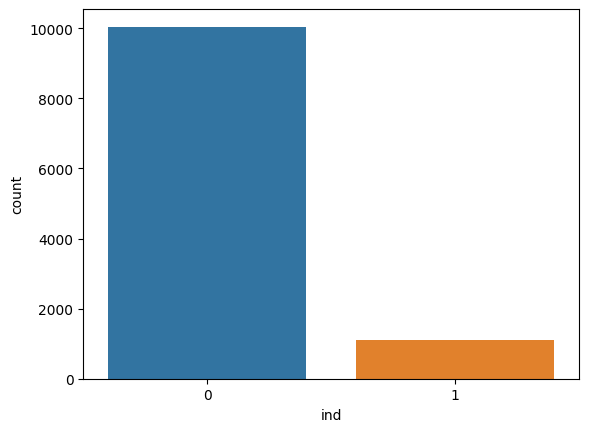

In [ ]:
sns.countplot(x = 'ind' , data = train)

#### Exploring relation between 'word_count', 'punc_num' and target variable

We can see that the dataset is highly imbalanced with approximately 10K 0s - Human Text, and 1800 1s - AI Generated Text. Hence, There might be a chance of balancing the dataset if the model doesn't perform well on test data.

<Axes: xlabel='punc_num', ylabel='Count'>

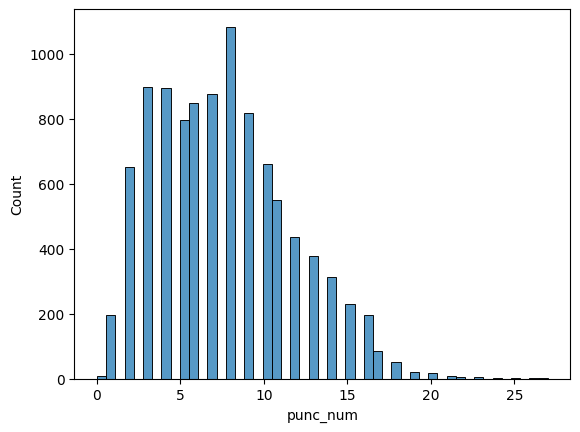

In [ ]:
sns.histplot( x = 'punc_num', data = train[train['ind'] == 0])

<Axes: xlabel='punc_num', ylabel='Count'>

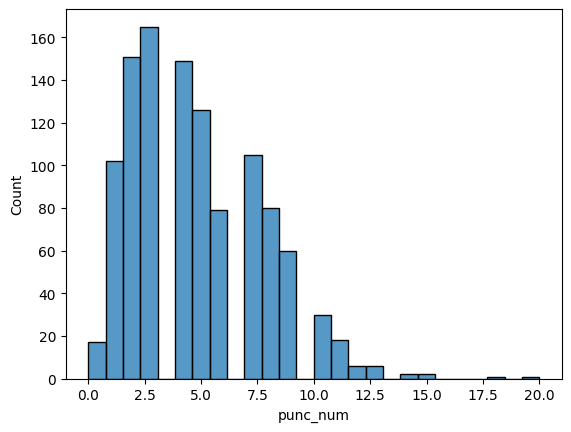

In [ ]:
sns.histplot( x = 'punc_num', data = train[train['ind'] == 1])

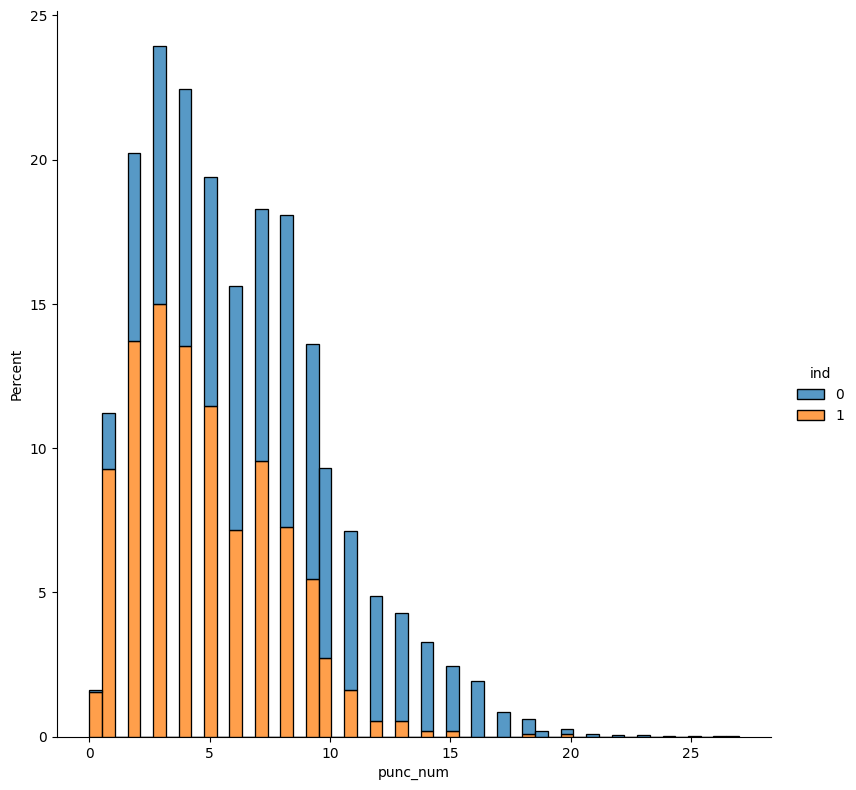

In [ ]:
sns.displot( x = 'punc_num', data = train, stat = 'percent', hue = 'ind', common_norm=False, multiple = 'stack', height=8)

From the histogram plot of punctuation count, we can see that AI Generated text have less number of puncuations than human generated.

In [ ]:
sns.displot( x = 'word_count', data = train[train['ind'] == 1], common_norm=False, multiple = 'stack', height=4)

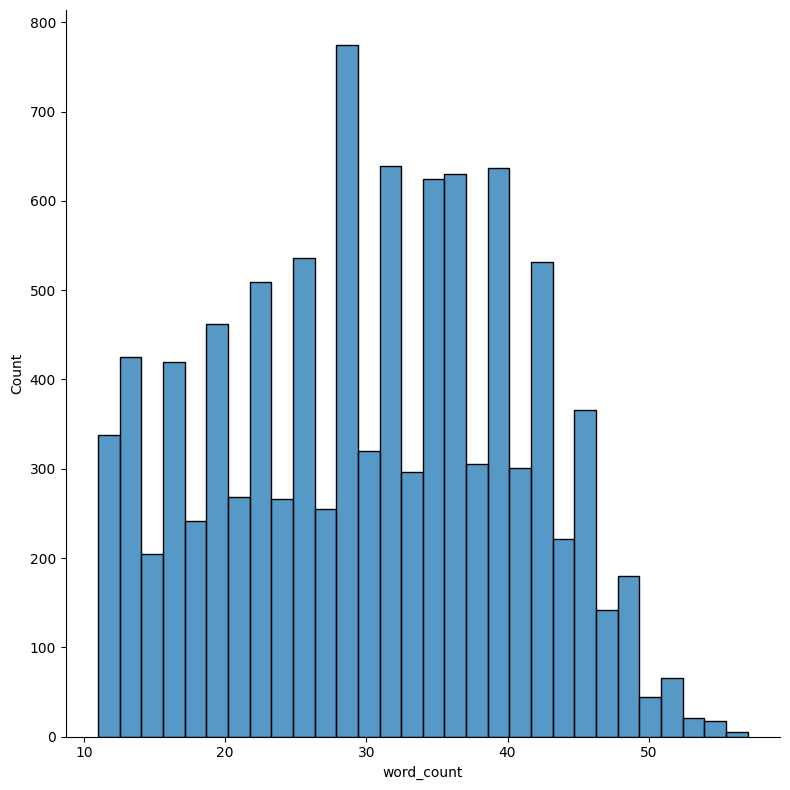

In [ ]:
sns.displot( x = 'word_count', data = train[train['ind'] == 0], common_norm=False, multiple = 'stack', height=8)

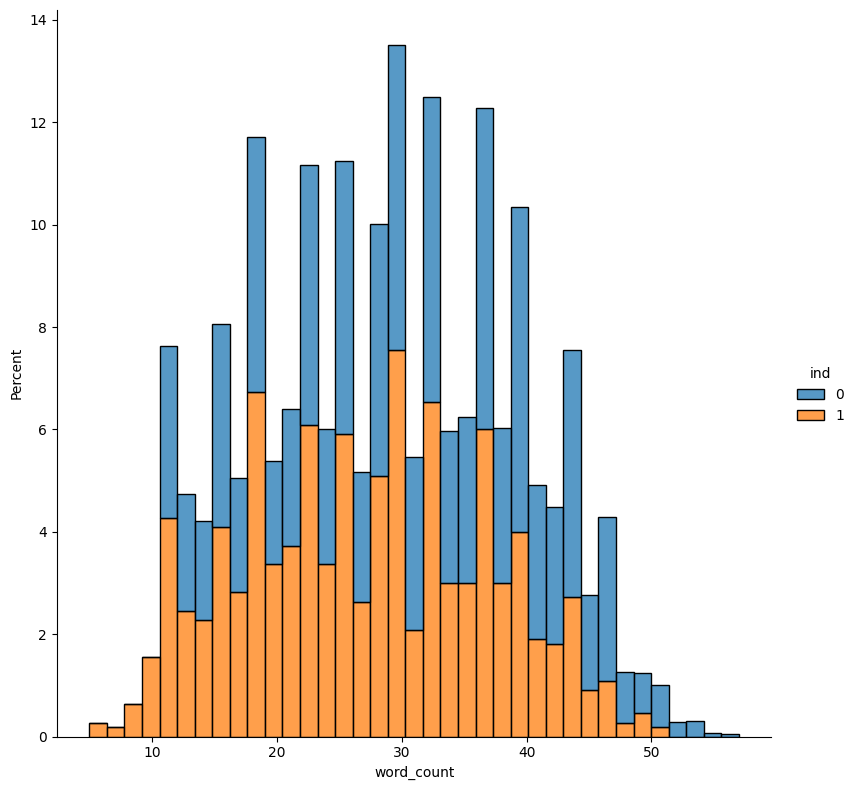

In [ ]:

sns.displot( x = 'word_count', data = train, stat = 'percent', hue = 'ind', common_norm=False, multiple = 'stack', height=8)


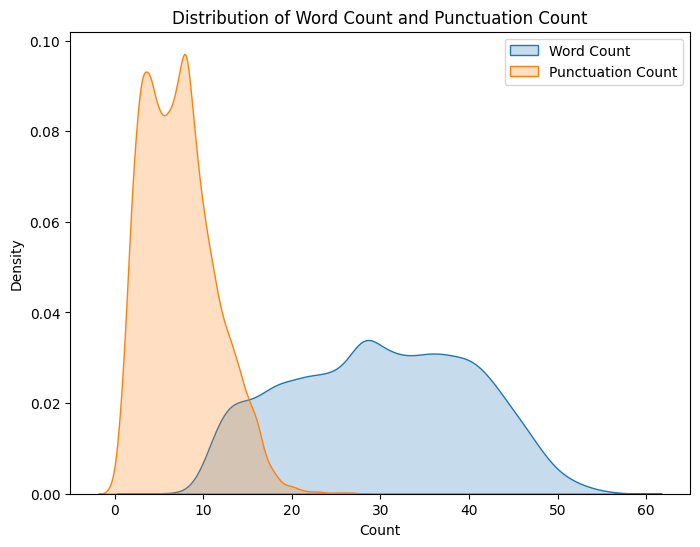

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame

# Plotting the distributions of 'word_count' and 'punc_num'
plt.figure(figsize=(8, 6))

sns.kdeplot(train['word_count'], label='Word Count', fill=True)
sns.kdeplot(train['punc_num'], label='Punctuation Count', fill=True)

plt.title('Distribution of Word Count and Punctuation Count')
plt.xlabel('Count')
plt.ylabel('Density')
plt.legend()
plt.show()

data = train[train['ind'] == 0]


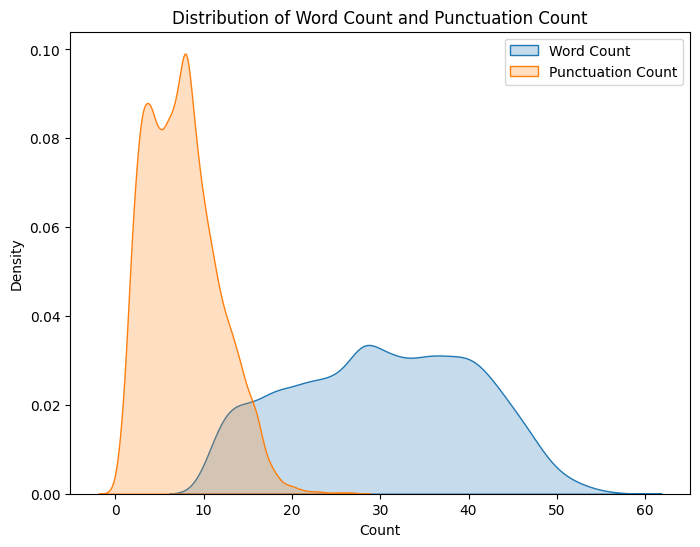

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame

# Plotting the distributions of 'word_count' and 'punc_num'
plt.figure(figsize=(8, 6))

sns.kdeplot(train[train['ind'] == 0]['word_count'], label='Word Count', fill=True)
sns.kdeplot(train[train['ind'] == 0]['punc_num'], label='Punctuation Count', fill=True)

plt.title('Distribution of Word Count and Punctuation Count')
plt.xlabel('Count')
plt.ylabel('Density')
plt.legend()
plt.show()



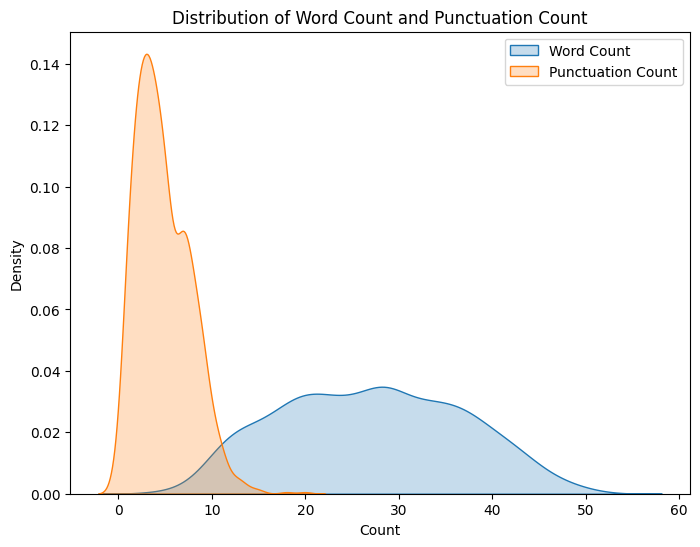

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame

# Plotting the distributions of 'word_count' and 'punc_num'
plt.figure(figsize=(8, 6))

sns.kdeplot(train[train['ind'] == 1]['word_count'], label='Word Count', fill=True)
sns.kdeplot(train[train['ind'] == 1]['punc_num'], label='Punctuation Count', fill=True)

plt.title('Distribution of Word Count and Punctuation Count')
plt.xlabel('Count')
plt.ylabel('Density')
plt.legend()
plt.show()



#### Sample Distribution of word embeddings

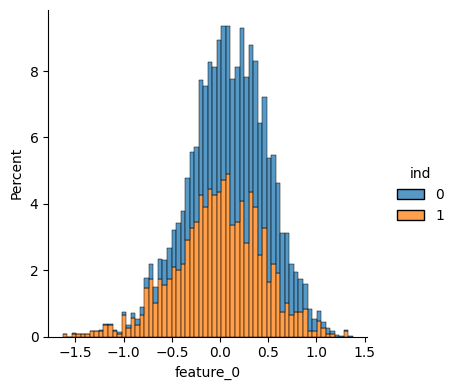

In [ ]:
sns.displot( x = 'feature_0', data = train, stat = 'percent', hue = 'ind', common_norm=False, multiple = 'stack', height=4)

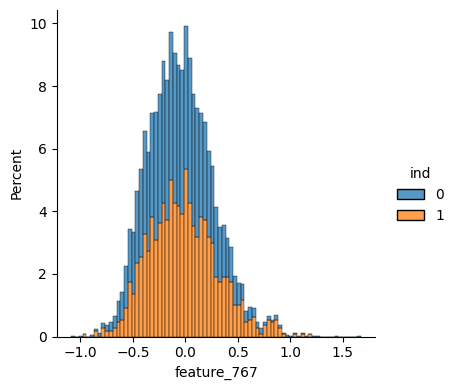

In [ ]:
sns.displot( x = 'feature_767', data = train, stat = 'percent', hue = 'ind', common_norm=False, multiple = 'stack', height=4)

#### Correlation between 'word_count' & 'punc_num'

<Axes: >

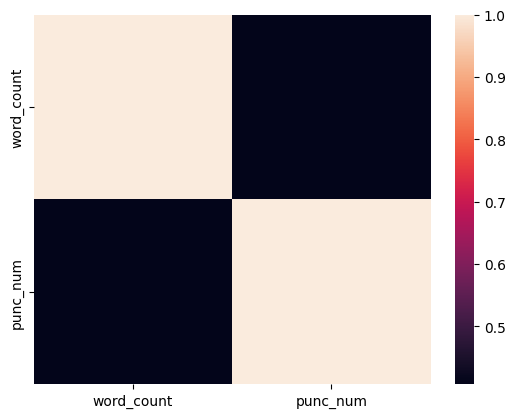

In [ ]:
sns.heatmap(train[['word_count', 'punc_num']].corr())

Correlation check between word count and punctuation count shows that there is no significant linear relation between word count and punctuation count.

#### Sample Correlation between 10 word embedding features

<Axes: >

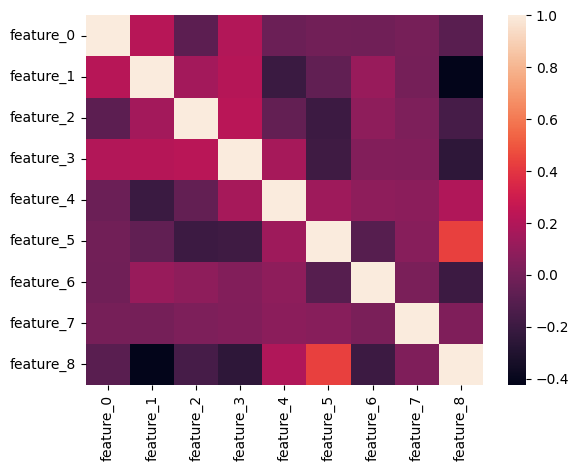

In [ ]:
sns.heatmap(train.iloc[:, 1:10].corr())

Sample correlation check for the first 10 features. No significant correlation between first 10 features. Hence there might be no significant correlation between the word embeddings.

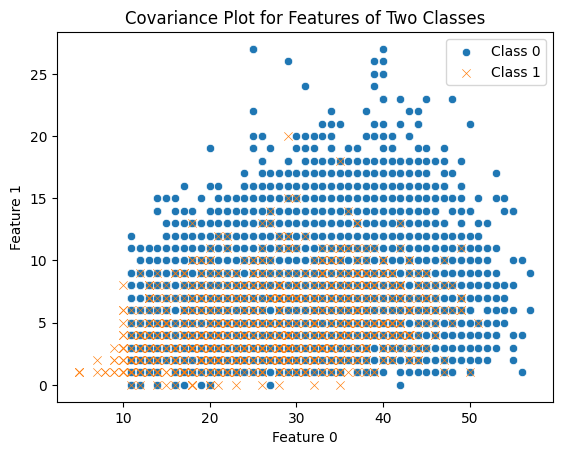

In [ ]:
# Separate the data into two classes
class_0 = train[train['ind'] == 0]
class_1 = train[train['ind'] == 1]
# Class A covariance plot
sns.scatterplot(x='word_count', y='punc_num', data=class_0, label='Class 0', marker='o')

# Class B covariance plot
sns.scatterplot(x='word_count', y='punc_num', data=class_1, label='Class 1', marker='x')

# Add legend
plt.legend()

# Set plot labels and title
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Covariance Plot for Features of Two Classes')

# Show the plot
plt.show()

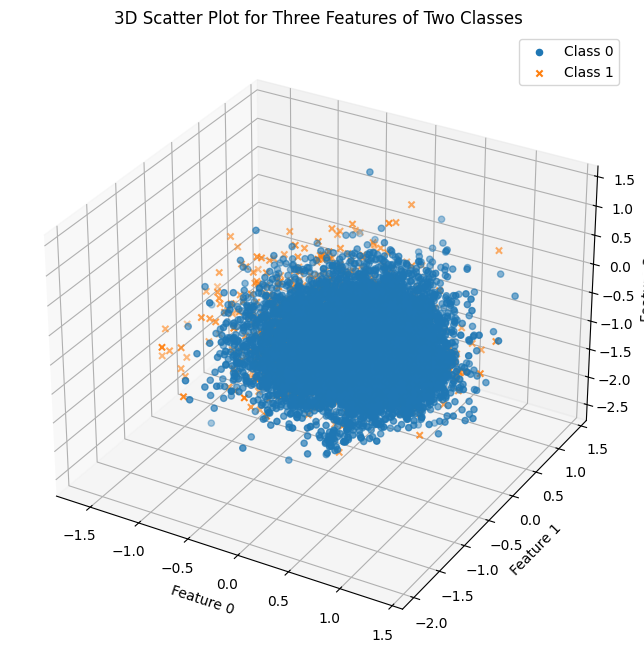

In [ ]:
# Separate the data into two classes
class_0 = train[train['ind'] == 0]
class_1 = train[train['ind'] == 1]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Class A scatter plot
ax.scatter(class_0['feature_0'], class_0['feature_1'], class_0['feature_2'], label='Class 0', marker='o')

# Class B scatter plot
ax.scatter(class_1['feature_0'], class_1['feature_1'], class_1['feature_2'], label='Class 1', marker='x')

# Set plot labels and title
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 2')
ax.set_title('3D Scatter Plot for Three Features of Two Classes')

# Add legend
ax.legend()

# Show the plot
plt.show()

### Tables

In [ ]:
summary_stats = train[['word_count', 'punc_num']].describe()
print(summary_stats)

         word_count      punc_num
count  11144.000000  11144.000000
mean      29.978643      7.347003
std       10.271548      4.041350
min        5.000000      0.000000
25%       22.000000      4.000000
50%       30.000000      7.000000
75%       38.000000     10.000000
max       57.000000     27.000000


In [ ]:
train[['word_count', 'punc_num', 'ind']].pivot_table(index = 'ind', values = ['word_count', 'punc_num'], aggfunc = 'mean')

,punc_num,word_count
ind,,
0,7.628136,30.297292
1,4.780000,27.069091


In [ ]:
train[['word_count', 'punc_num', 'ind']].pivot_table(index = 'ind', values = ['word_count', 'punc_num'], aggfunc = 'median')

,punc_num,word_count
ind,,
0,7,31
1,4,27


From the above table we can say that the human text has more number of average words, punctuations per tweet than AI generated text

## Data Prep

### Train Validation Test Split

In [ ]:
X = train.iloc[:, 1:771]
y = train.iloc[: , 771:772]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(10029, 770) (10029, 1) (1115, 770) (1115, 1)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(9026, 770) (9026, 1) (1003, 770) (1003, 1)


In [ ]:
X_train_cols = X_train.columns

#### Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
X_train_scaled[['word_count', 'punc_num']].describe()

,word_count,punc_num
count,9.026000e+03,9.026000e+03
mean,-3.463758e-17,-7.793456e-17
std,1.000055e+00,1.000055e+00
min,-2.431572e+00,-1.824126e+00
25%,-7.755343e-01,-8.293185e-01
50%,3.777408e-03,-8.321290e-02
75%,7.830892e-01,6.628927e-01
max,2.633955e+00,4.890824e+00


In [ ]:
from sklearn.preprocessing import Normalizer
# Initialize the Normalizer
normalizer = Normalizer(norm='l2')
X_train_norm = pd.DataFrame(normalizer.fit_transform(X_train), columns=X_train.columns)
X_val_norm = pd.DataFrame(normalizer.transform(X_val), columns=X_val.columns)
X_test_norm = pd.DataFrame(normalizer.transform(X_test), columns=X_test.columns)

In [ ]:
X_train_norm[['word_count', 'punc_num']].describe()

,word_count,punc_num
count,9026.000000,9026.000000
mean,0.773744,0.192820
std,0.130574,0.094649
min,0.157935,0.000000
25%,0.711442,0.115939
50%,0.818260,0.189020
75%,0.871930,0.252155
max,0.941311,0.649426


### Feature Engineering

In [ ]:
X_train_scaled.iloc[:, :768].columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'feature_758', 'feature_759', 'feature_760', 'feature_761',
       'feature_762', 'feature_763', 'feature_764', 'feature_765',
       'feature_766', 'feature_767'],
      dtype='object', length=768)

In [ ]:
#PCA
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA()
temp = pca.fit_transform(X_train_scaled.iloc[:, : 768])


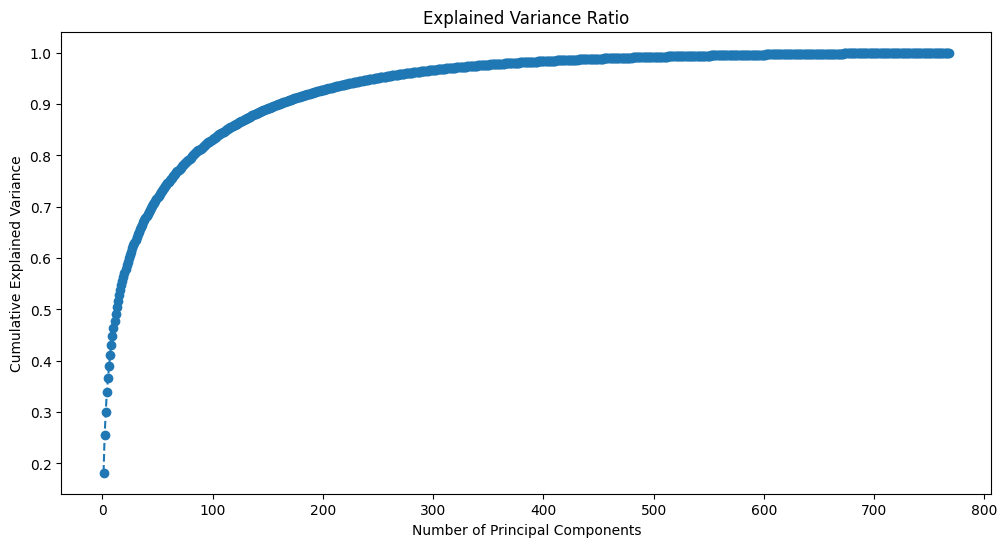

Number of components to retain 95% variance: 248


In [ ]:
# Plot explained variance ratio
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Determine the number of components to retain based on the explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
num_components = (cumulative_variance <= 0.95).sum() + 1
print(f"Number of components to retain 95% variance: {num_components}")

In [ ]:
# Apply PCA with the chosen number of components
num_components = 767
pca = PCA(n_components=num_components)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_norm.iloc[:, : 768]))
X_val_pca = pd.DataFrame(pca.fit_transform(X_val_norm.iloc[:, : 768]))
X_test_pca = pd.DataFrame(pca.fit_transform(X_test_norm.iloc[:, : 768]))


In [ ]:
X_train_pca[[800, 801]] = X_train_scaled.iloc[:, 768:]
X_val_pca[[800, 801]] = X_val_scaled.iloc[:, 768:]
X_test_pca[[800, 801]]= X_test_scaled.iloc[:, 768:]

In [ ]:
X_train_pca.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            759, 760, 761, 762, 763, 764, 765, 766, 800, 801],
           dtype='int64', length=769)

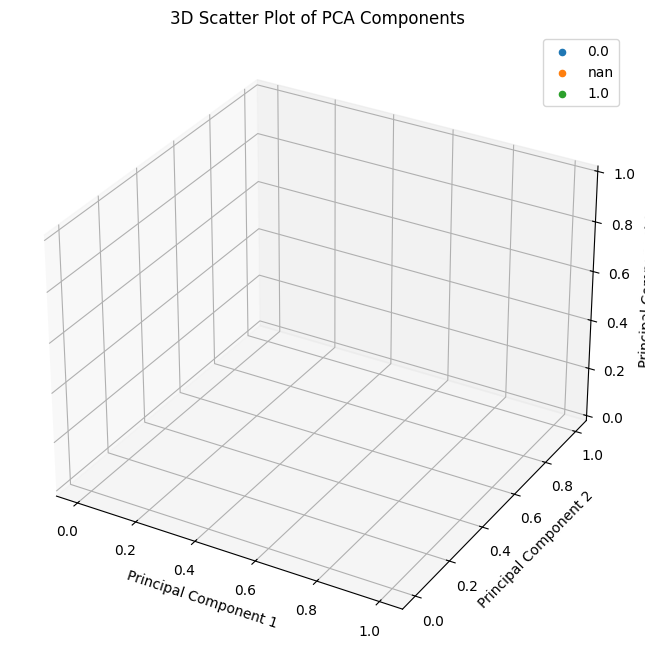

In [ ]:
# Create a DataFrame with the reduced features
columns_pca = [f'PC{i}' for i in range(1, num_components + 1)]
df_pca = pd.DataFrame(X_train_pca, columns=columns_pca)
df_pca['Class'] = y_train['ind']

# Visualize the reduced dataset (you can use your preferred visualization method)
# For example, a 3D scatter plot for the first three principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in df_pca['Class'].unique():
    subset = df_pca[df_pca['Class'] == label]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], label=label)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of PCA Components')
ax.legend()
plt.show()

In [ ]:
# Creating 3 gram average for all features
# Function to create 3-gram averages
def create_3gram_averages(df):
    num_columns = len(df.columns)
    new_columns = [f'3gram_{i}' for i in range(num_columns - 2)]  # New column names for 3-grams

    for i in range(num_columns - 2):
        col_range = df.iloc[:, i:i+3]  # Selecting consecutive columns
        df[new_columns[i]] = col_range.mean(axis=1)  # Calculating mean along rows for the 3-gram

    return df

In [ ]:
# Creating 3-gram averages for each set of 3 consecutive features
X_resampled_with_3grams = create_3gram_averages(X_resampled.iloc[:, 1:768])
X_val_with_3grams = create_3gram_averages(X_val.iloc[:, 1:768])
X_test_with_3grams = create_3gram_averages(X_test.iloc[:, 1:768])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [ ]:
X_resampled_with_3grams.shape

(16260, 1532)

### Balancing The Target Variables

In [ ]:
print(X_train_norm.shape, y_train.shape)
print( y_train.value_counts())

(9026, 770) (9026, 1)
ind
0      8130
1       896
dtype: int64


In [ ]:
#Oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_norm, y_train)

In [ ]:
print(X_train_resampled.shape, y_train_resampled.shape)
print( y_train_resampled.value_counts())

(16260, 770) (16260, 1)
ind
0      8130
1      8130
dtype: int64


In [ ]:
#Undersampling
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy=0.5)
X_train_resampled, y_train_resampled = under.fit_resample(X_train_norm, y_train)

In [ ]:
print(X_resampled.shape, y_resampled.shape)
print( y_resampled.value_counts())

(2688, 248) (2688, 1)
ind
0      1792
1       896
dtype: int64


## Model Building

In [ ]:
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

#### FF Model

In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(400, input_shape=(X_train_resampled.shape[1],), activation='relu'))
# dropout
model.add(Dropout(0.2))
# hidden layer
model.add(Dense(400, activation='relu'))
# dropout
#model.add(Dropout(0.1))
# hidden layer
model.add(Dense(400, activation='relu'))
# dropout
#model.add(Dropout(0.2))
model.add(Dense(400, activation='relu'))
# output layer
model.add(Dense(1, activation='sigmoid'))

# looking at the model summary
model.summary()
# Define optimizer
opt = Adam(learning_rate=0.01)
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# compiling the sequential model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.AUC(from_logits=True)], optimizer= opt)
# training the model for 10 epochs
history = model.fit(X_train_resampled, y_train_resampled, batch_size=64, epochs=1000, validation_split =0.3, callbacks=[early_stopping])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 400)               308400    
                                                                 
 dropout_2 (Dropout)         (None, 400)               0         
                                                                 
 dense_11 (Dense)            (None, 400)               160400    
                                                                 
 dense_12 (Dense)            (None, 400)               160400    
                                                                 
 dense_13 (Dense)            (None, 400)               160400    
                                                                 
 dense_14 (Dense)            (None, 1)                 401       
                                                                 
Total params: 790001 (3.01 MB)
Trainable params: 79000

#### RNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional, GRU

# Convert word embeddings to numpy array
word_embeddings = X.iloc[:, :768].values  # Assuming columns feature_0 to feature_767 are word embeddings

X_train_reshaped = (X_train_resampled.values).reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
X_val_reshaped = (X_val_norm.values).reshape((X_val_norm.shape[0], X_val_norm.shape[1], 1))

# Define the RNN model
# Define the RNN model
# Define a CNN-RNN hybrid model architecture
rnn_model = Sequential([
    LSTM(units=128, return_sequences=True),
    Dropout(0.2),
    LSTM(units=64),
    Dropout(0.2),
    Dense(600, activation='relu'),
    Dropout(0.2),
    Dense(300, activation='relu'),
    Dropout(0.2),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])



# Define optimizer
opt = Adam()

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model
rnn_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(from_logits=True)])

# Train the model
rnn_model.fit(X_train_reshaped, y_train_resampled, epochs=1000, batch_size=500, validation_data=(X_val_reshaped, y_val), callbacks=[early_stopping])

Epoch 1/1000
 6/33 [====>.........................] - ETA: 41s - loss: 0.6927 - auc_66: 0.4984

KeyboardInterrupt: 

In [ ]:
from keras.layers import SimpleRNN

X_train_reshaped = (X_train_resampled.values).reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
X_val_reshaped = (X_val_norm.values).reshape((X_val_norm.shape[0], X_val_norm.shape[1], 1))
# Build the Simple RNN model
srnn_model = Sequential()

# Add a SimpleRNN layer
srnn_model.add(SimpleRNN(units=50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))

# Add a Dense output layer (adjust based on your task)
srnn_model.add(Dense(units=1, activation='sigmoid'))

# Define optimizer
opt = Adam(learning_rate=0.001)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model
srnn_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(from_logits=True)])

# Train the model
srnn_model.fit(X_train_reshaped, y_train_resampled, epochs=1000, batch_size=500, validation_data=(X_val_reshaped, y_val), callbacks=[early_stopping])

Epoch 1/1000
33/33 [==============================] - 15s 445ms/step - loss: 0.6853 - auc_49: 0.5877 - val_loss: 0.7123 - val_auc_49: 0.5831
Epoch 2/1000
33/33 [==============================] - 15s 454ms/step - loss: 0.6841 - auc_49: 0.5869 - val_loss: 0.7012 - val_auc_49: 0.6967
Epoch 3/1000
33/33 [==============================] - 13s 407ms/step - loss: 0.6814 - auc_49: 0.5902 - val_loss: 0.6633 - val_auc_49: 0.6683
Epoch 4/1000
33/33 [==============================] - 14s 434ms/step - loss: 0.6773 - auc_49: 0.6457 - val_loss: 0.6459 - val_auc_49: 0.6639
Epoch 5/1000
33/33 [==============================] - 14s 436ms/step - loss: 0.6717 - auc_49: 0.6819 - val_loss: 0.6641 - val_auc_49: 0.6522
Epoch 6/1000
33/33 [==============================] - 14s 434ms/step - loss: 0.6705 - auc_49: 0.6352 - val_loss: 0.6849 - val_auc_49: 0.6301
Epoch 7/1000
33/33 [==============================] - 14s 416ms/step - loss: 0.6695 - auc_49: 0.6513 - val_loss: 0.6477 - val_auc_49: 0.6798
Epoch 8/1000


In [ ]:
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

X_train_reshaped = (X_train_resampled.values).reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
X_val_reshaped = (X_val_norm.values).reshape((X_val_norm.shape[0], X_val_norm.shape[1], 1))
# Build the Simple RNN model
# Build the CNN model
cnn_model = Sequential()

# Add an Embedding layer if your word embeddings need to be learned
# model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=seq_length))

# Add a 1D convolutional layer
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))

# Add a global max pooling layer
cnn_model.add(MaxPooling1D(2))

cnn_model.add(Bidirectional(LSTM(120,
                            return_sequences=True, # remember, if stacking layers, you need to return sequences!
                            activation='relu',
                            recurrent_dropout=0.3)))

cnn_model.add(GRU(20, activation='relu'))
cnn_model.add(Dropout(0.3))
# Add a Dense layer for classification
cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dropout(0.3))
# Add the output layer (adjust based on your task)
cnn_model.add(Dense(units=1, activation='sigmoid'))

# Define optimizer
opt = Adam(learning_rate=0.001)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model
cnn_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(from_logits=True)])

# Train the model
cnn_model.fit(X_train_reshaped, y_train_resampled, epochs=1000, batch_size=500, validation_data=(X_val_reshaped, y_val), callbacks=[early_stopping])


Epoch 1/1000
33/33 [==============================] - 187s 6s/step - loss: 0.6926 - auc_51: 0.5197 - val_loss: 0.7036 - val_auc_51: 0.5726
Epoch 2/1000
33/33 [==============================] - 189s 6s/step - loss: nan - auc_51: 0.5517 - val_loss: nan - val_auc_51: 0.5000
Epoch 3/1000
33/33 [==============================] - 214s 7s/step - loss: nan - auc_51: 0.5000 - val_loss: nan - val_auc_51: 0.5000
Epoch 4/1000
33/33 [==============================] - 250s 8s/step - loss: nan - auc_51: 0.5000 - val_loss: nan - val_auc_51: 0.5000
Epoch 5/1000
33/33 [==============================] - 237s 7s/step - loss: nan - auc_51: 0.5000 - val_loss: nan - val_auc_51: 0.5000
Epoch 6/1000
27/33 [=======================>......] - ETA: 42s - loss: nan - auc_51: 0.5000

KeyboardInterrupt: 

## Model Evaluation

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred = y_pred.round()

35/35 [==============================] - 0s 7ms/step


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix


auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc_score:.2f}")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
f1 = f1_score(y_test,y_pred)
print(f"F1 Score: {f1:.2f}")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

AUC: 0.82
Accuracy: 0.93
F1 Score: 0.64
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1010
           1       0.61      0.69      0.64       105

    accuracy                           0.93      1115
   macro avg       0.79      0.82      0.80      1115
weighted avg       0.93      0.93      0.93      1115


Confusion Matrix:
[[963  47]
 [ 33  72]]


In [ ]:
# stealing this from our other scripts
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'auc_27', 'val_loss', 'val_auc_27'])

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['auc_6']
val_acc = history.history['val_auc_6']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

KeyError: 'auc_6'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'model' is your neural network model
# 'model' should be already trained on your data

# Get the weights of the first layer
weights = model.layers[0].get_weights()[0]

# Calculate feature importance by taking absolute values and normalizing
importance = np.mean(np.abs(weights), axis=1)

# Plotting the feature importance
plt.bar(range(len(importance)), importance)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance in Neural Network First Layer')
plt.show()

## Base Model Comparision - Logistic Regresion

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)

y_pred = logreg.predict(X_test_norm)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# Evaluate the model

auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc_score:.2f}")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
f1 = f1_score(y_test,y_pred)
print(f"F1 Score: {f1:.2f}")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

AUC: 0.83
Accuracy: 0.83
F1 Score: 0.48
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1010
           1       0.34      0.82      0.48       105

    accuracy                           0.83      1115
   macro avg       0.66      0.83      0.69      1115
weighted avg       0.92      0.83      0.86      1115


Confusion Matrix:
[[840 170]
 [ 19  86]]


Top 10 Important Features:
         Feature  Coefficient
768   word_count     3.064026
150  feature_150     1.975548
736  feature_736     1.948939
383  feature_383     1.674241
687  feature_687     1.618538
714  feature_714     1.483515
386  feature_386     1.411300
61    feature_61     1.389635
214  feature_214     1.366073
80    feature_80     1.341849

Bottom 10 Important Features:
         Feature  Coefficient
703  feature_703     0.004863
250  feature_250     0.004387
95    feature_95     0.004292
366  feature_366     0.004245
38    feature_38     0.003099
247  feature_247     0.002897
73    feature_73     0.002802
734  feature_734     0.001452
519  feature_519     0.001244
397  feature_397     0.000579


<Axes: ylabel='Feature'>

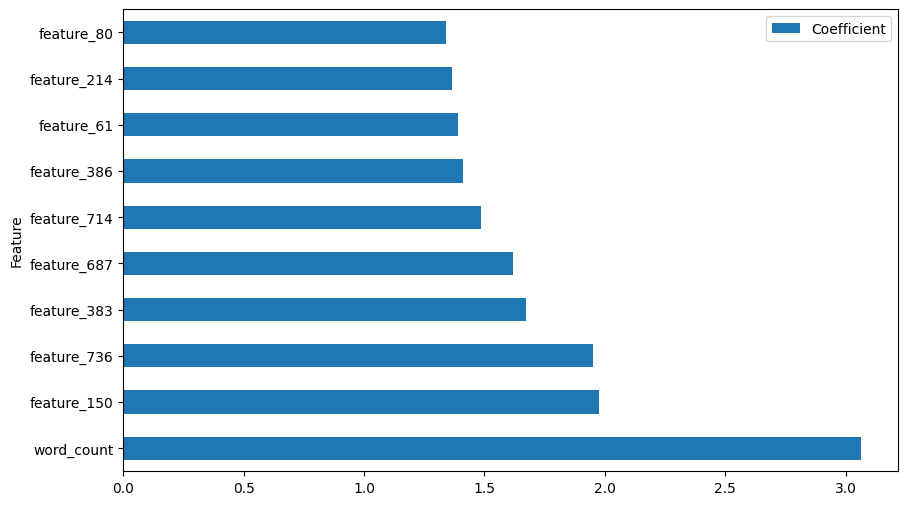

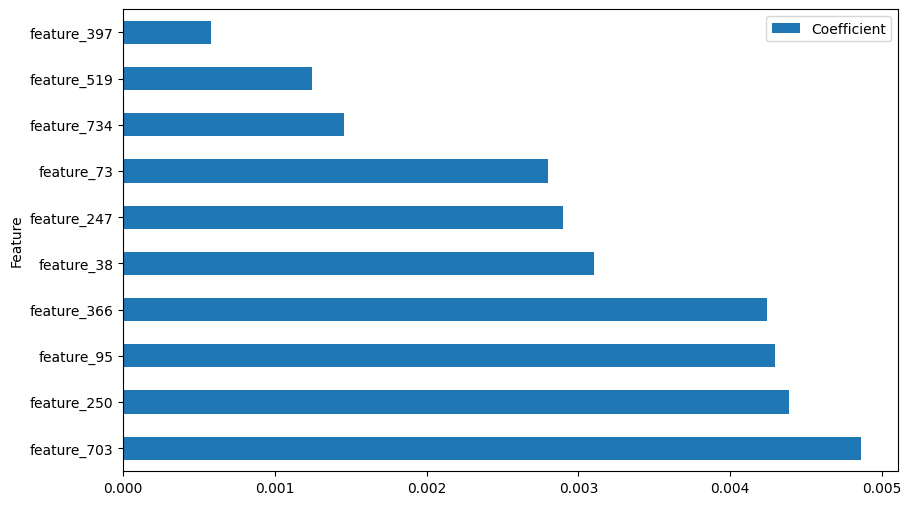

In [ ]:
coefficients = logreg.coef_[0]
absolute_coefficients = abs(coefficients)

# Create a DataFrame to display feature names and their coefficients
coefficients_df = pd.DataFrame({'Feature': X_train_cols, 'Coefficient': absolute_coefficients})
# Sort the DataFrame by coefficient values
coefficients_df_sorted = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Top 10 important features
top_10_features = coefficients_df_sorted.head(10)

# Bottom 10 important features
bottom_10_features = coefficients_df_sorted.tail(10)

# Display the results
print("Top 10 Important Features:")
print(top_10_features)

print("\nBottom 10 Important Features:")
print(bottom_10_features)

top_10_features.plot(x='Feature', y='Coefficient', kind='barh', figsize=(10, 6))
bottom_10_features.plot(x='Feature', y='Coefficient', kind='barh', figsize=(10, 6))

#### Competetion Submission File

In [ ]:
#remove ID col
X_submit = test.iloc[:, 1:]
#scaling
X_submit = normalizer.transform(X_submit)

In [ ]:
y_submit = model.predict(X_submit)
y_submit = y_submit.round()
solution = pd.DataFrame()
solution['ID'] = test['ID']
solution['Ind'] = y_submit
solution['Ind'].value_counts()

88/88 [==============================] - 0s 2ms/step


0.0    2428
1.0     358
Name: Ind, dtype: int64

In [ ]:
solution.to_csv('C:/solution.csv', index = False)

# Conclusion

It is my expectation that you spend time working on this to get the best performing model - do not start at the last minute and just blindly copy/paste code (big points off) - really get into the details and try to get the best model you can! You should use lots of subheaders so that your project is easy to grade. Write five bullets with two or three sentences per bullet. Tell me of all of the successes and failures you had while you were modeling, and tell me why you think your model is predicting the way that it does (feel free to add some extra plots or tables here if it will help!)



1. Our best-performing model is a feed-forward neural network with 2 dense layers and 2 dropout layers. We tuned our model by adjusting the layers and implementing the dropout layers for regularization and epochs. We used smaller batch sizes as we have a huge dataset with 11144 rows for faster convergence. Since this is a classification problem, we trained our model by prioritizing AUC and validation loss.


2. Our best model (feed forward neural network) had 0.72 f1 score, 0.82 auc, and 0.95 accuracy indicating better performance. Also, we obtained the confusion matrix with the following values:


> [[993  17]
  
> [ 37  68]]

The model predicts well with fewer false negatives(37) and false positives (17).


> *class precision  recall*

> **0         0.96        0.98**     
> **1         0.80        0.65**



* From the precision and recall of class 0 and class 1, we can tell that the
precision and recall for class 0 is relatively high indicating the model is predicting and identifying class 0 well. class 1 precision is decently good and recall is relatively low indicating that the model is not so good in identifying class 1 this might be because we have very less class 1 data compared to class 0.


3. We tried using models like simple RNN and LSTM, but, their F1 scores were lower compared to our Feedforward Neural Networks. The LSTM, is mostly used to handle sequential data, struggled with our large dataset, facing challenges like forgetting crucial information from initial layers. Additionally,LSTMs and simple RNNs are effective for recurring models, they didn't perform well in our classification problem.
We think that the Feedforward Neural Network worked for this problem because it might have effectively captured essential patterns in the data without needing to retain sequential information like the recurrent models.



4. When we compared our FNN (Feedforward Neural Network) model with a baseline model (logistic regression), our FNN achieved an accuracy of 95%, 0.82 auc and an F1 score of 0.72.On the other side the base line model showcased an F1 score of 0.66, an AUC (Area Under the Curve) of 0.79, and an accuracy of 94%.On looking at scores of both the models our model performs better than base line with high f1 score achieving a balance between precision and recall.


5. we have learnt about document embedings(aggregation of word embedings by averaging techniques like TF-IDF weighted averages). we learnt what techniques(scaling, sampling, dimensionality reduction) are suitable for this particular classification problem.  We learnt how to tune the hyper parametrs like adding dropout layers, choosing batch sizes epoch values, adding number of layers which are impacting the models accuracy. we have learnt how important to tune hyper parameters as we got different results for different values of the parameters.



6. The major challenges we faced while doing our project is to balance the data we tried different techniques like SMOT, Randomoversampling,undersampling and  Stratified sampling. we have very less data of class 1(AI Generated). So SMOT analysis worked for our model. This might be because SMOTE generates synthetic samples for minority class, augementing the feature space, which helps in capturing the complexity of the feature.



*   The other thing we tried is principle component analysis(PCA), as we have many features we thought PCA could reduce the dimentionality by capturing crucial information.Although PCA retained 95% of the valuable  information, it didn't help our model to train better. This can be due to the fact that crucial patterns in the data were lost, affecting the model's ability to learn effectively. This loss of information might have resulted in the model not capturing essential relationships or characteristics present in the original dataset despite retaining most of its variability.
*   on performing normalisation and scaling we got best results with scaling the data rather than normalising it. The reason might be that during normalising, the data is compressed between 0 and 1, so there will be information loss for the kind of data which is having larger variance or having outliers.


# Appendix

In [ ]:
#PCA
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA()
temp = pca.fit_transform(X_train_scaled.iloc[:, : 768])


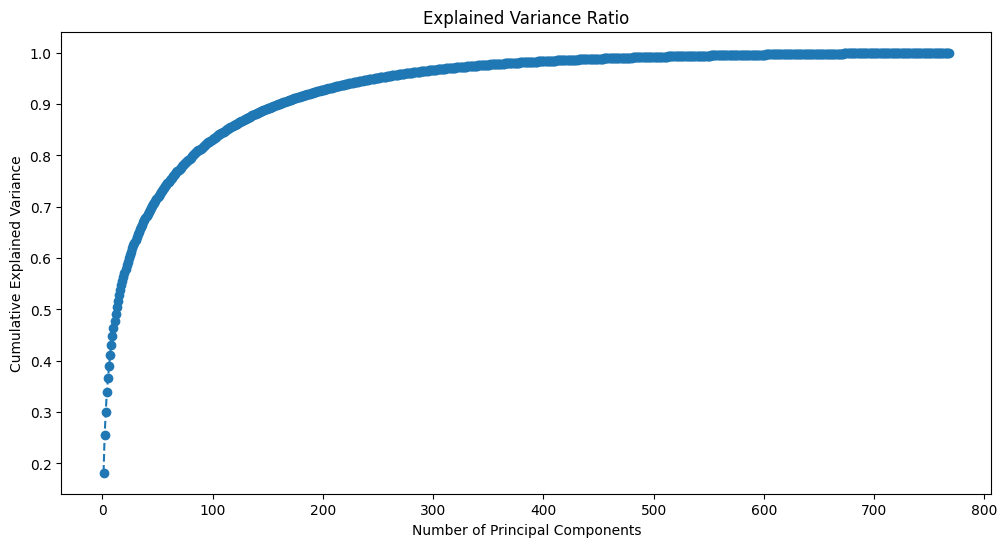

Number of components to retain 95% variance: 248


In [ ]:
# Plot explained variance ratio
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Determine the number of components to retain based on the explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
num_components = (cumulative_variance <= 0.95).sum() + 1
print(f"Number of components to retain 95% variance: {num_components}")